In [15]:
# Importing necessary libraries
import pandas as pd

# Load the data
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|', low_memory=False)

# Display the first few rows of the DataFrame
print(data.head())

# Check the data types of each column
print(data.dtypes)




   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoor

In [10]:
# Handle missing values
# For numerical columns, fill missing values with mean or median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [11]:
# For categorical columns, fill missing values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [14]:
# Save cleaned data to a new file
data.to_csv('../data/cleaned_data.csv', index=False)

/tmp/ipykernel_32550/1730177076.py:6: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/cleaned_data.csv')


Descriptive statistics:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.488056e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360059e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.046616e+00   2.466869e+03  9.721553e+01   
std        3.261391e+00  2.939410e-01   4.427106e+02  1.939061e+01   
min        1.987000e+03  0.000000e+00   0.00000

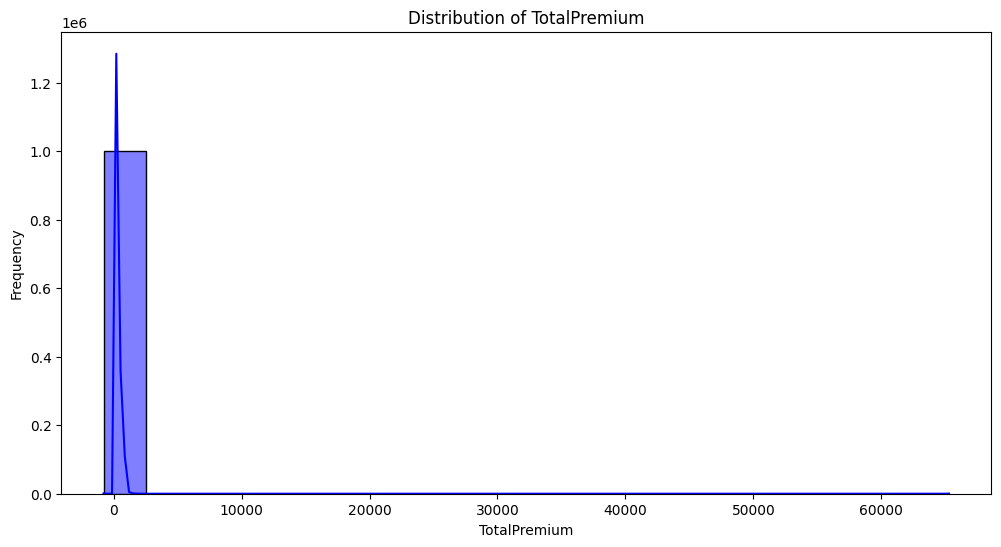

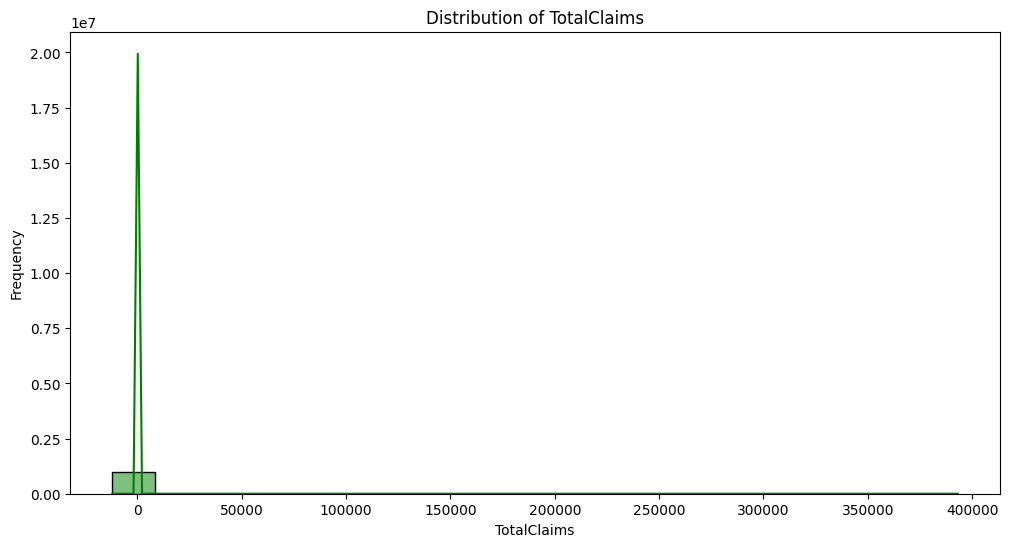

/tmp/ipykernel_32550/1730177076.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['CoverCategory'], palette='Set1')


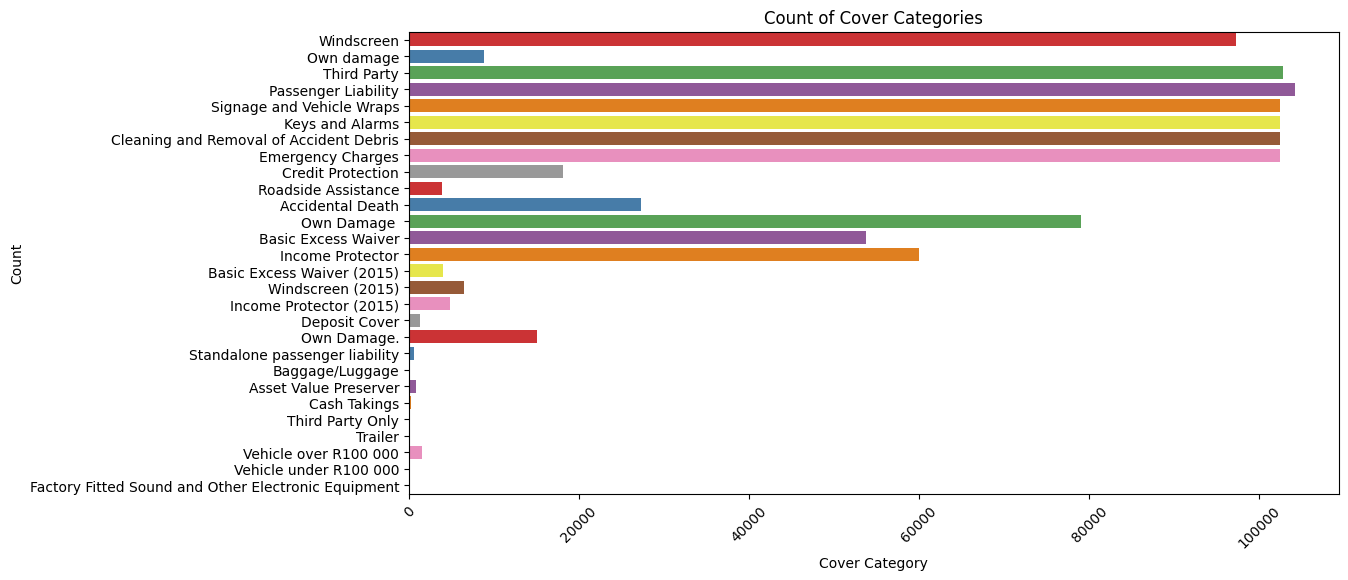

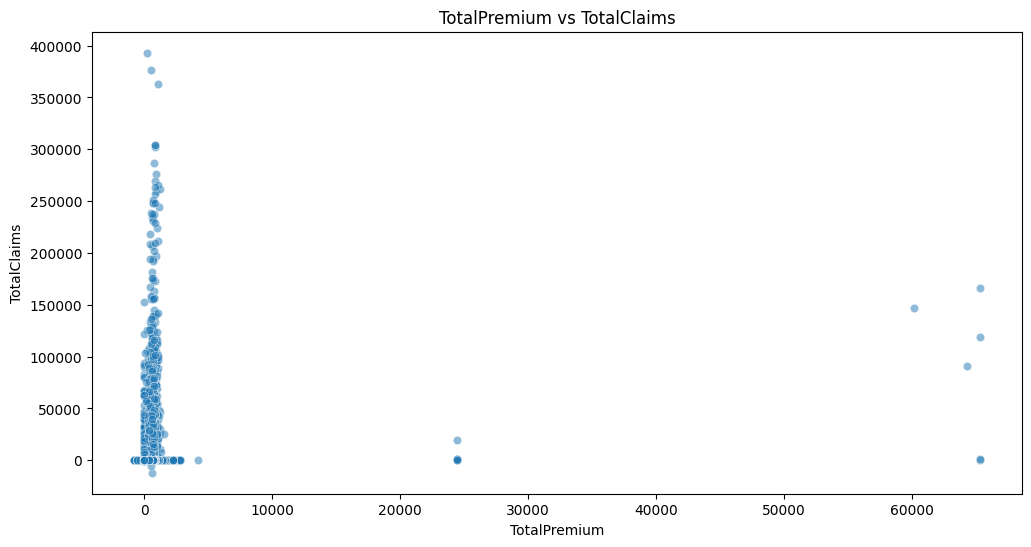

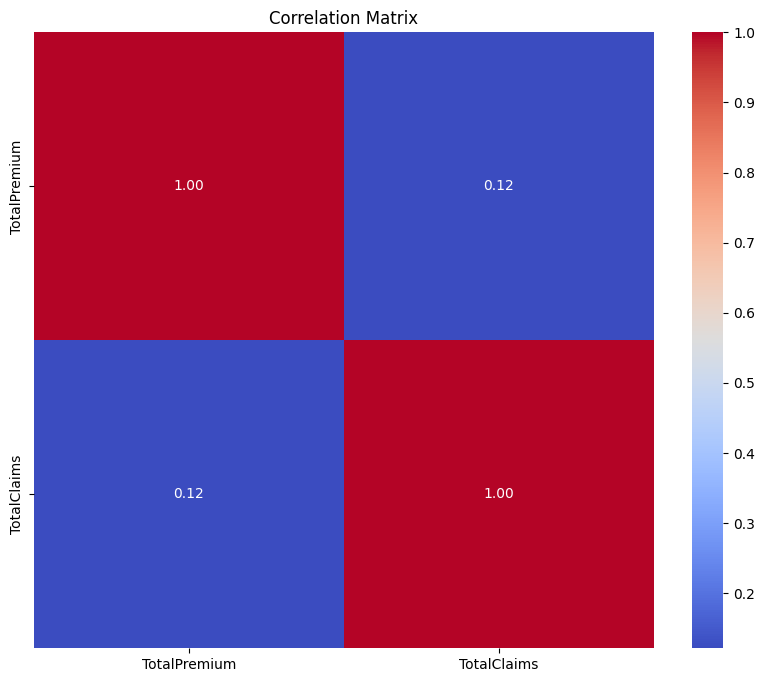

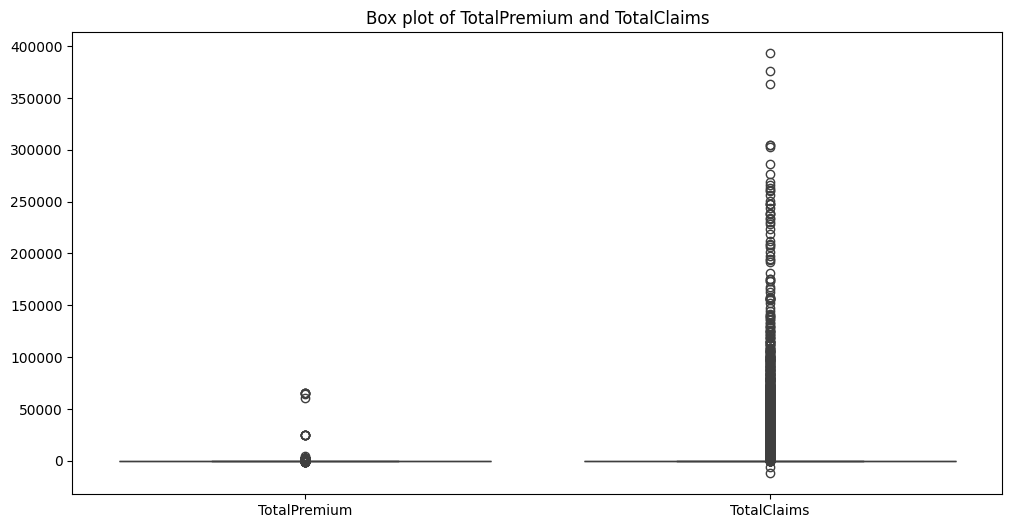

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data = pd.read_csv('../data/cleaned_data.csv')

# Task 1: Data Summarization

# Descriptive statistics
print("Descriptive statistics:")
print(data.describe())

# Data structure
print("\nData structure:")
print(data.dtypes)

# Task 2: Data Quality Assessment

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Task 3: Univariate Analysis

# Distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data['TotalPremium'], bins=20, kde=True, color='blue')
plt.title('Distribution of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['TotalClaims'], bins=20, kde=True, color='green')
plt.title('Distribution of TotalClaims')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()

# Bar charts for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(data['CoverCategory'], palette='Set1')
plt.title('Count of Cover Categories')
plt.xlabel('Cover Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Task 4: Bivariate or Multivariate Analysis

# Scatter plot and correlation matrix
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data, alpha=0.5)
plt.title('TotalPremium vs TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data[['TotalPremium', 'TotalClaims']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Task 5: Data Comparison
# (This task might require additional analysis based on specific comparisons desired)

# Task 6: Outlier Detection

# Box plots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['TotalPremium', 'TotalClaims']])
plt.title('Box plot of TotalPremium and TotalClaims')
plt.show()




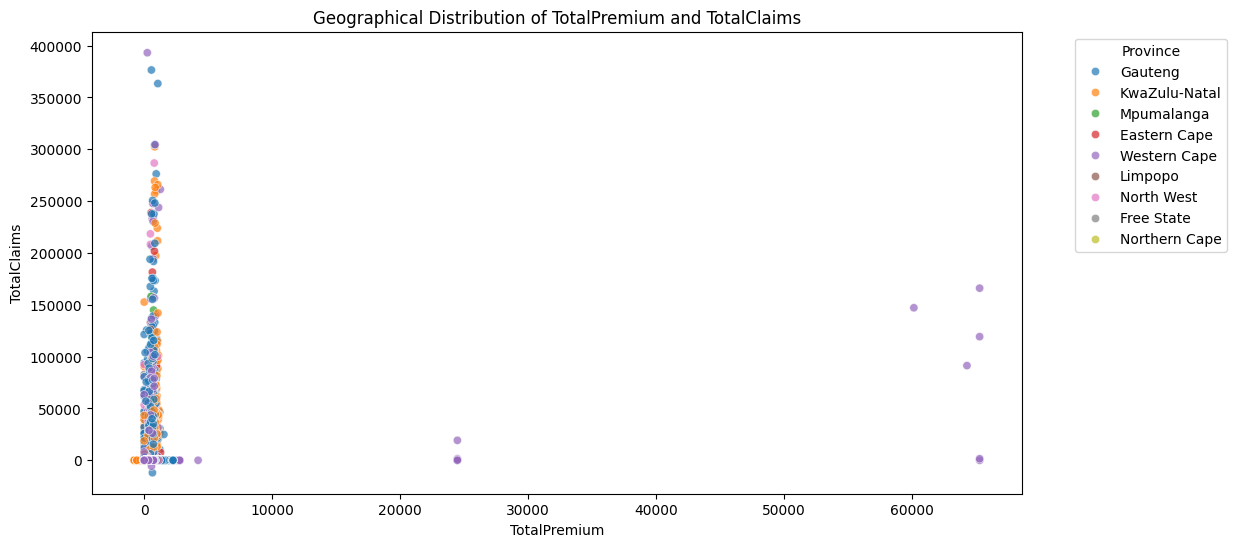

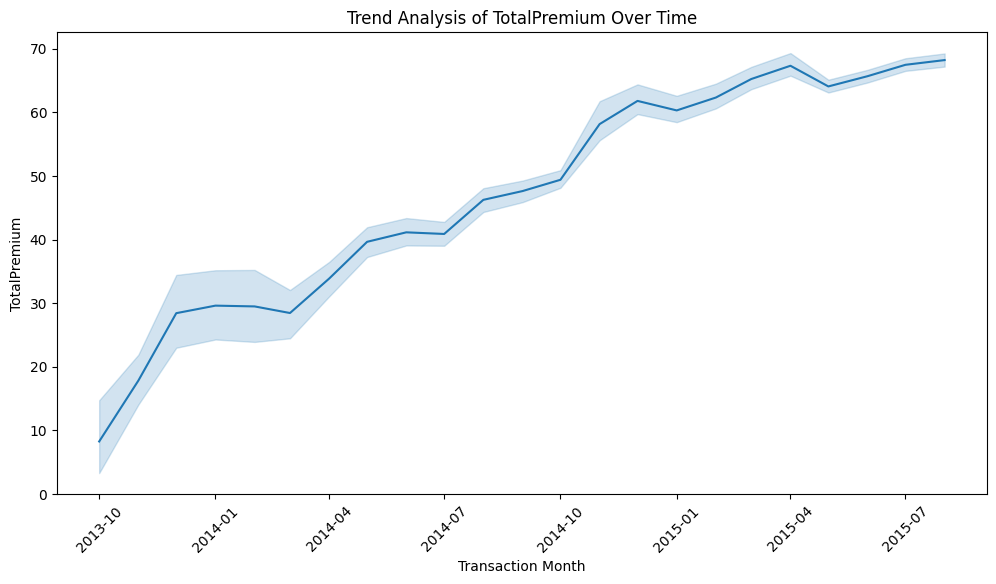

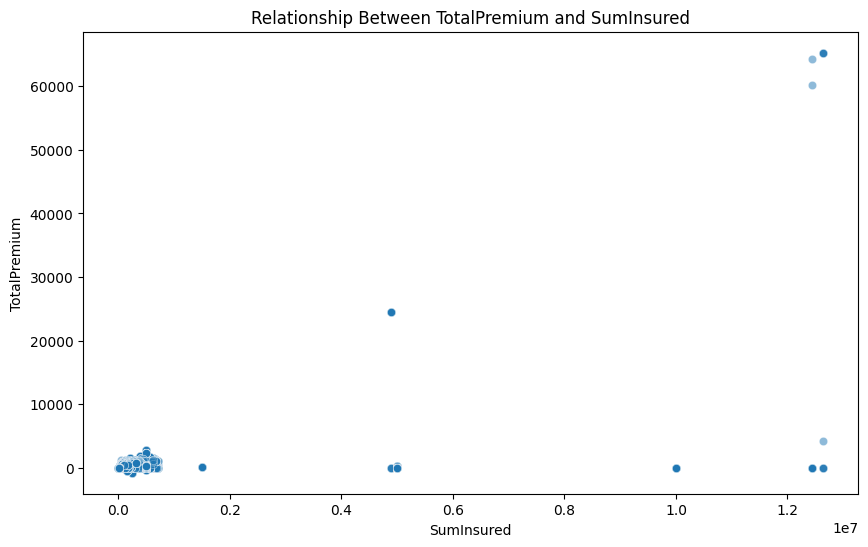

In [16]:
# Task 7: Visualization
# Plot 1: Geographical Distribution of TotalPremium and TotalClaims
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=data, alpha=0.7)
plt.title('Geographical Distribution of TotalPremium and TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 2: Trend Analysis of TotalPremium Over Time
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalPremium', data=data)
plt.title('Trend Analysis of TotalPremium Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('TotalPremium')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Relationship Between TotalPremium and SumInsured
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SumInsured', y='TotalPremium', data=data, alpha=0.5)
plt.title('Relationship Between TotalPremium and SumInsured')
plt.xlabel('SumInsured')
plt.ylabel('TotalPremium')
plt.show()
